In [1]:
import numpy as np
#import jax

# Question 1

## Question 1a

Sum of bernoulli random variables is equal to binomial distribution, so that's what's being used here

Your job is to sample n=50 posts

In [2]:
n = 50
p = 0.5
y = np.random.binomial(n=n, p=p)
samples = np.concatenate((np.zeros(y), np.ones(n-y)))
y

22


and estimate the approval rate of the CEO by considering the statistics of the approval rate of the CEO by considering the statistics of $y = \Sigma_{i=0}^{n}x_i$. 

Statistics:  
- $\bar{x}=\frac{Σ_{i=0}^{n}x_i}{n}$
- $\sigma^2=\frac{Σ_{i=0}^{n}(x_i-\bar{x})^2}{n-1}→\sigma=\sqrt{\frac{Σ_{i=0}^{n}(x_i-\bar{x})^2}{n-1}}$ 

In [3]:
xbar = y/n
print(f"sample mean \"xbar\" is: {xbar}")
#
S = np.sqrt(np.sum([(xi - xbar)**2 for xi in samples])/(n-1))
print(f"sample stdev \"S\" is: {S}")

sample mean "xbar" is: 0.44
sample stdev "S" is: 0.515870573864794


Probability that 25 employees approve of the CEO: $P(y=25)= {50 \choose 25}p^k (1-p)^{(n-k)}$

In [4]:
# What is the probability that 25 employees approve the CEO?
k = 25
(choose := (np.math.factorial(n)/(np.math.factorial(n-k)*np.math.factorial(k))))*(p**k)*((1-p)**(n-k))

0.11227517265921705

## Question 1b

$z = \frac{y-\mu_y}{\sigma_y}$, by central limit theorem implies that $z \sim \mathcal{N}(\mu_y, \sigma^2_y)$ where $\mu_y = 0 \land \sigma_y^2 = 1$. This gives that $(P(y = 25/50)|Y\sim\mathcal{B}(n,p))  ≃ = P(\frac{24.5 - 25} \leq z=\frac{25/50 - 0}{\sqrt{1}} \geq 25.5)$ 

We find then the probability of that interval:

In [5]:
mu = p*n
sigma = np.sqrt(p*(1-p)*n)
a = (24.5 - mu)/sigma
b = (25.5 - mu)/sigma
(a,b)

(-0.1414213562373095, 0.1414213562373095)

In [6]:
from scipy.stats import norm

final_probability = norm.cdf(b) - norm.cdf(a)
print(final_probability)

0.11246291601828484


# Question 2

This can be represented as a joint probability mass function, where Y is the urn from which the ball is drawn. 

- $P(X=1|Y=0)=2/3$
- $P(X=1|Y=1)=1/6$  
  
We also know that $P(Y=1)=1/2$.  
This gives us all the joint probability distributions:
- $P(X=1, Y=1) = 1/6 * 1/2$
- $P(X=0, Y=1) = 5/6 * 1/2$
- $P(X=1, Y=0) = 2/3 * 1/2$
- $P(X=0, Y=0) = 1/3 * 1/2$  
  
To obtain the result 0011, we consider first the probability of drawing a 0
  
- (0)011  
$P(X=0) = P(X=0,Y=0) + P(X=0,Y=1)$, the marginal probability $5/6*1/2 + 1/3*1/2$.

- 0(0)11
Now, for the next draw, we know we drew a 0. This indicates that we must draw from urn 0 for the next draw. This means that the next draw of 0 is $P(X=0|Y=0)=1/3$.

- 00(1)1  
Following the rule, we must again draw from urn 0, but this time we must draw a 1: $P(X=1|Y=0)=2/3$

- 001(1)  
We drew a 1 in the previous turn, so this final draw must be from urn 1. $P(X=1|Y=1)=1/6$

In total, all these events must happen together, so we multiply their probabilities: $P(X=0)×P(X=0|Y=0)×P(X=1|Y=0)×P(X=1|Y=1)$

In [7]:
((5/6*1/2)+(1/3*1/2))*(1/3)*(2/3)*(1/6)

0.021604938271604937

# Question 3

Bivariate normal distribution is given with $p(x_1, x_2)=\mathcal{N}(\begin{bmatrix} 0\\ 2 \end{bmatrix}, \begin{bmatrix} 0.3, -1\\ -1, 5 \end{bmatrix})$, so we start by defining those constants.

In [8]:
mu = np.array([0, 2])
sigma = np.array([[0.3, -1],[-1, 5]])

From the textbook we know that to sample a multivariate gaussian distribution, we can use the cholesky decomposition of the covariance matrix ($\boldsymbol{\Sigma}$) to obtain a lower left triangular matrix s.t. $\boldsymbol{A} \boldsymbol{A}^T=\boldsymbol{\Sigma}$. This allows us to obtain a sample that is multivariate normally distributed around $\mu=0$ after finding the product of the matrix $\boldsymbol{A}$ with a column vector of appropriate size of normally distributed gaussian random variables with mean $\mu=0$ and variance $\sigma^2=1$. This transforms the sample from the multinomial distribution $\mathcal{N}(\boldsymbol{0}, \boldsymbol{I})$ to one in $\mathcal{N}(\boldsymbol{0}, \boldsymbol{\Sigma})$. Following that, adding the existing mean vector $\boldsymbol{\mu}$ shifts the means of the newly obtained distribution to the desired location, giving $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

def sample_multinomial_gaussian(mu=mu, sigma=sigma):
    A_mat = np.linalg.cholesky(sigma)
    x_vec = np.random.normal(size=2)
    y_vec = mu + np.dot(A_mat, x_vec)
    return y_vec

samples = pd.DataFrame([sample_multinomial_gaussian() for x in range(5000)])

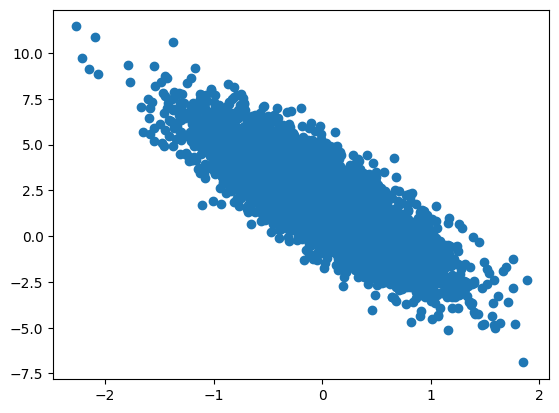

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(samples[0], samples[1])

# Question 4

## 1. 

In [66]:
import pandas as pd

df = pd.read_csv('../data/01_raw/nyc-east-river-bicycle-counts.csv')
df.head()

Unnamed: 0                 Date                  Day  High Temp (°F)  \
0           0  2016-04-01 00:00:00  2016-04-01 00:00:00            78.1   
1           1  2016-04-02 00:00:00  2016-04-02 00:00:00            55.0   
2           2  2016-04-03 00:00:00  2016-04-03 00:00:00            39.9   
3           3  2016-04-04 00:00:00  2016-04-04 00:00:00            44.1   
4           4  2016-04-05 00:00:00  2016-04-05 00:00:00            42.1   

   Low Temp (°F) Precipitation  Brooklyn Bridge  Manhattan Bridge  \
0           66.0          0.01           1704.0              3126   
1           48.9          0.15            827.0              1646   
2           34.0          0.09            526.0              1232   
3           33.1      0.47 (S)            521.0              1067   
4           26.1             0           1416.0              2617   

   Williamsburg Bridge  Queensboro Bridge  Total  
0               4115.0             2552.0  11497  
1               2565.0             1884.0   6922  
2               1695.0             1306.0   4759  
3               1440.0             1307.0   4335  
4               3081.0             2357.0   9471

In [67]:
chunked_dataset = df[['Date', 'Brooklyn Bridge']].groupby('Date').sum().reset_index(drop=False)
chunked_dataset.head()

Date  Brooklyn Bridge
0  2016-04-01 00:00:00          11928.0
1  2016-04-02 00:00:00           5789.0
2  2016-04-03 00:00:00           3682.0
3  2016-04-04 00:00:00           3647.0
4  2016-04-05 00:00:00           9912.0

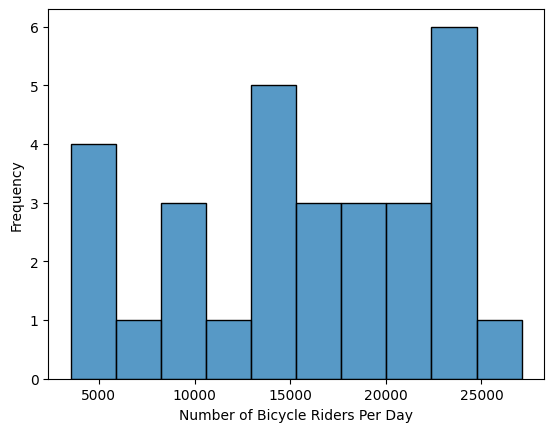

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.histplot(chunked_dataset["Brooklyn Bridge"], bins=10)
plt.xlabel("Number of Bicycle Riders Per Day")
plt.ylabel("Frequency")
plt.show(fig)

## 2.

For poisson distribution, seek to extract existing sample parameters and simulate them.   

Find that the only parameter is $\lambda$ which is the mean number of events

In [76]:
pois_lambda = df['Brooklyn Bridge'].mean()
pois_lambda

2269.633333333333

In [77]:
def sample_poisson():
    return np.random.poisson(lam=pois_lambda)

samples = [sample_poisson() for _ in range(chunked_dataset.shape[0])]
pd.Series(samples).mean()

2264.4666666666667

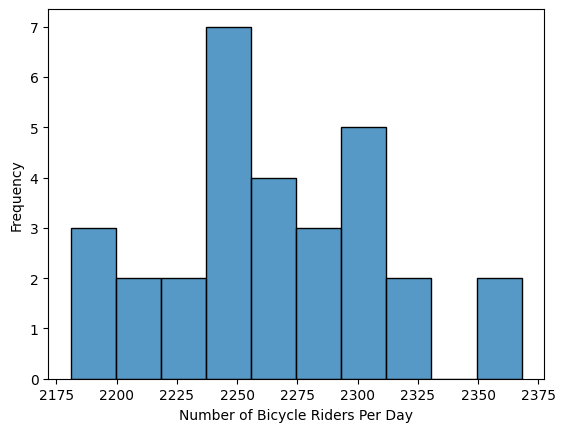

In [79]:
fig2 = sns.histplot(samples, bins=10)
plt.xlabel("Number of Bicycle Riders Per Day")
plt.ylabel("Frequency")
plt.show(fig)

# Question 5

Need to simulate the behavior of M/M/1 queue and plot the number of requests that are waiting in the queue as a function of time.  

Axes of plot are y = Number of Requests, and x = Time

Need to simulate the queue as a function of time. Given that arrival times are independent of service times, we can obtain a sample of exponentially distributed arrival times without the need for any other information. Then, given the number of arrivals, each arrival has a service time. The number of requests at a given time interval is then given as the number of arrival, service time completion pairs that are bisected by a given time t. 

In [4]:
lambda1, lambda2, lambda3 = (1, 3, 4)
mu = 4

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import pdb

def MM1(lamb = lambda2, mu = mu, SIM_LENGTH = 2500000,  SCALING_FACTOR = 0.001) -> pd.DataFrame:
    queue = []
    log = []
    
    time_of_arrival = 0
    timedelta = np.random.exponential(1/lamb)
    
    # t here is a range of time [t, t+1)
    for t in range(SIM_LENGTH):
        while (SCALING_FACTOR * t) < time_of_arrival + timedelta < (SCALING_FACTOR * (t+1)):
            time_of_arrival += timedelta
            queue.append(
                {
                    "time of arrival": time_of_arrival,
                    "time of resolution": np.NaN
                }
            )
            timedelta = np.random.exponential(1/lamb)
            
        if len(queue) > 0:    
            if queue[0]["time of resolution"] is np.NaN:
                queue[0]["time of resolution"] = (SCALING_FACTOR * t) + np.random.exponential(1/mu)
            if (SCALING_FACTOR * t) > queue[0]["time of resolution"]:
                queue.pop(0)
        log.append({"Time": (SCALING_FACTOR * t), "Number of Requests": len(queue)})
    return pd.DataFrame(log)

## $\lambda=1$

<Axes: xlabel='Number of Requests', ylabel='Count'>

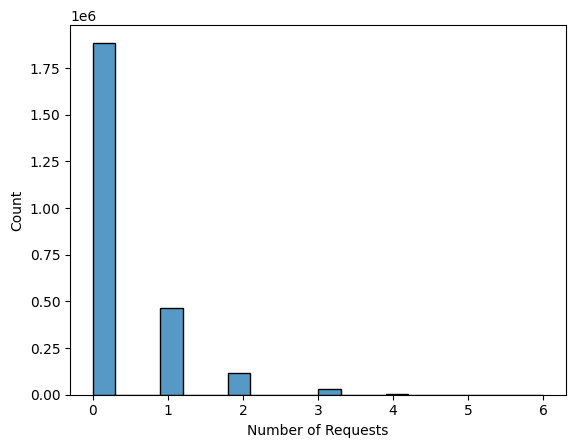

In [6]:
df_lam1 = MM1(lamb=lambda1, mu=mu)
sns.histplot(df_lam1, x="Number of Requests", bins=20)

In [7]:
df_lam1["Number of Requests"].mean()

0.3212716

In [8]:
rho = lambda1/mu
expected_mean = rho/(1-rho)
expected_mean

0.3333333333333333

In [9]:
# Good enough. Unlike the princeton demo, the code I wrote has discrete steps, which introduces a bit of variability to the 

<Axes: xlabel='Time', ylabel='Number of Requests'>

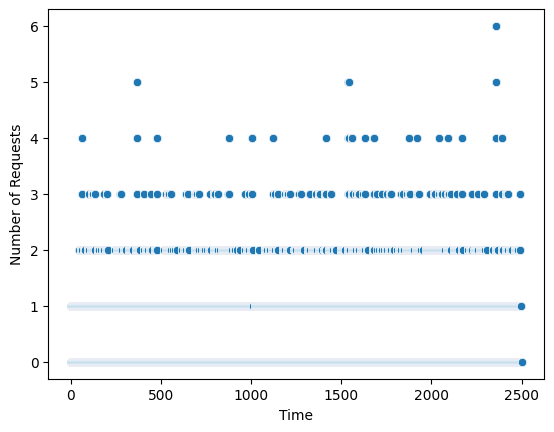

In [19]:
# plot the number of requests that are waiting in the queue as a function of time
sns.scatterplot(df_lam1, y="Number of Requests", x="Time")

## $\lambda=2$

<Axes: xlabel='Number of Requests', ylabel='Count'>

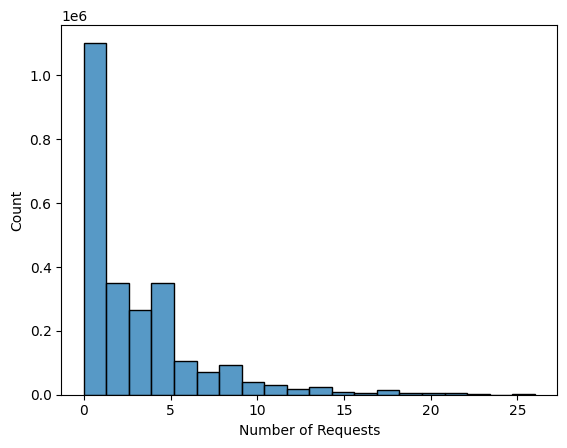

In [10]:
df_lam2 = MM1(lamb=lambda2, mu=mu)
sns.histplot(df_lam2, x="Number of Requests", bins=20)

In [11]:
df_lam2["Number of Requests"].mean()

3.0497912

In [12]:
rho = lambda2/mu
expected_mean = rho/(1-rho)
expected_mean

3.0

<Axes: xlabel='Time', ylabel='Number of Requests'>

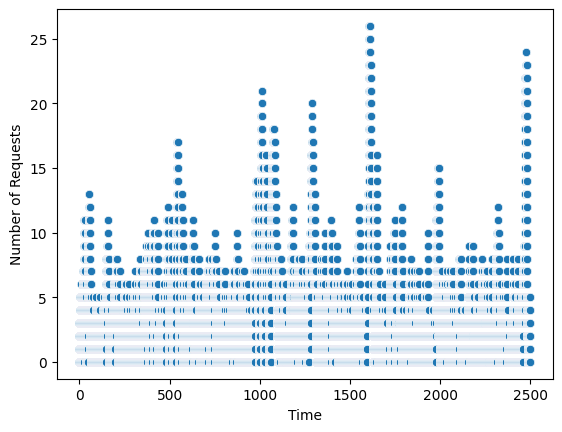

In [21]:
#plot the number of requests that are waiting in the queue as a function of time
sns.scatterplot(df_lam2, y="Number of Requests", x="Time")

## $\lambda=3$

<Axes: xlabel='Number of Requests', ylabel='Count'>

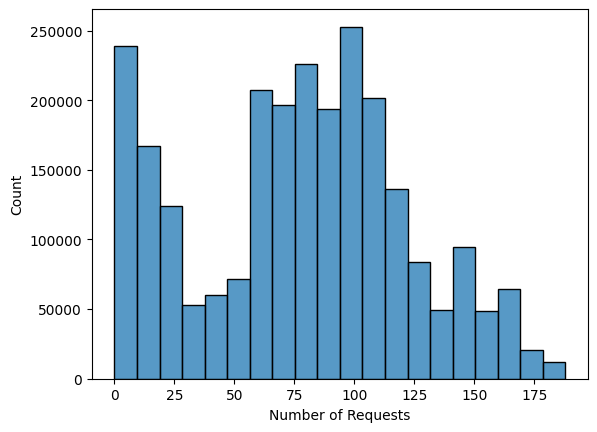

In [13]:
df_lam3 = MM1(lamb=lambda3, mu=mu)
sns.histplot(df_lam3, x="Number of Requests", bins=20)

In [14]:
df_lam3["Number of Requests"].mean()

77.3641952

In [15]:
rho = lambda3/mu
expected_mean = rho/(1-rho)
expected_mean

ZeroDivisionError: float division by zero

<Axes: xlabel='Time', ylabel='Number of Requests'>

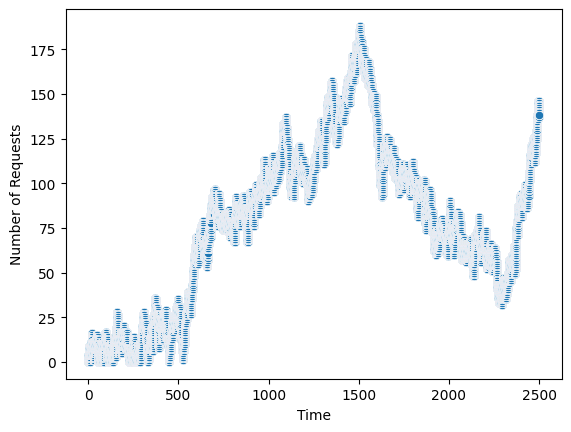

In [22]:
#plot the number of requests that are waiting in the queue as a function of time
sns.scatterplot(df_lam3, y="Number of Requests", x="Time")

# See if we just got lucky

In [16]:
print(f" Actual: {MM1(lamb=3, mu=25, SIM_LENGTH=int(2e6), SCALING_FACTOR=1e-4)['Number of Requests'].mean()}")
rho = 3/25
expected_mean = rho/(1-rho)
print(f"Theoretical: {expected_mean}")

 Actual: 0.142347
Theoretical: 0.13636363636363635
